<a href="https://colab.research.google.com/github/AIZamanova/CompVis/blob/main/%D0%96%D0%B5%D0%BB%D1%82%D1%8B%D0%B9_%D0%BE%D0%B1%D1%8A%D0%B5%D0%BA%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving кубики.jpg to кубики (2).jpg


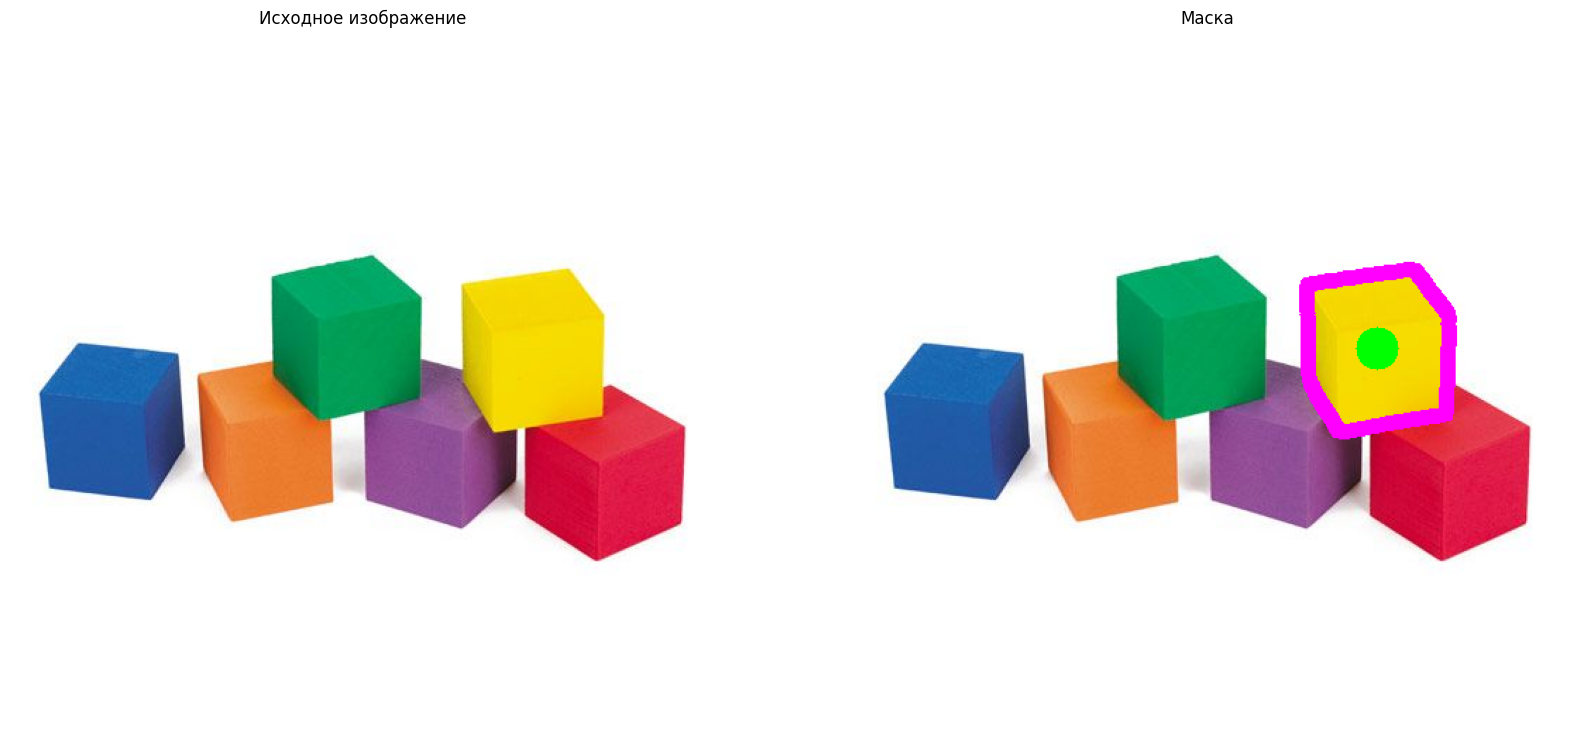

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
image_path = next(iter(uploaded))

#Чтение кадра
frame = cv2.imread(image_path)
frame_ish = cv2.imread(image_path)
#Преобразуем в HSV
frame_HSV = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

#Пороги
low_yellow = np.array([20, 110, 110])
high_yellow = np.array([32, 255, 255])

mask = cv2.inRange(frame_HSV, low_yellow, high_yellow)

contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for contour in contours:
  area = cv2.contourArea(contour)
  if area > 2000:
    M = cv2.moments(contour)
    if M["m00"] != 0:  # Проверяем, чтобы избежать деления на ноль
      cX = int(M["m10"] / M["m00"])
      cY = int(M["m01"] / M["m00"])

      # Рисуем контур
      cv2.drawContours(frame, [contour], -1, (255, 0, 255), 10)
      # Рисуем центр масс
      cv2.circle(frame, (cX, cY), 15, (0, 255, 0), -1)
      # Выводим координаты центра масс
      cv2.putText(frame, f'Center: ({cX}, {cY})', (60, 60), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 5)

#Вывод кадра
plt.figure(figsize = (20, 10))
plt.subplot(1, 2, 1)
plt.title('Исходное изображение')
plt.axis("off")
plt.imshow(cv2.cvtColor(frame_ish, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Маска')
plt.axis("off")
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

plt.show()

